# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
import matplotlib as plt

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

 - **Does the Smartcab move at all during the simulation?**

    No, the Smartcab stays parked. During a unique training trial, the smartcab stay in the same place, it change when the training trial changes. In the next new training trial, the Smartcab still stays parked.
    
    
 - **What kind of rewards is the driving agent receiving?**
 
    In general we have 2 states
    
    1 - Red light
    
    2 - Green ligth with no trafic oncoming
    
   The Smartcab are tested to understand the red and green light. Usually, cars stay idle during the red light and can move during the green light (if there is no car on the way). Based in this simple rule, the Smartcab receives a positive rewards when the light is red and it stays idle and receives a negative reward when the light is green and the Smartcab also stay idle.
   
   
 - **How does the light changing color affect the rewards?**
  
   Assuming that the smartcab is idle, the green light rewards around -5.7 to -4.3 and when red light rewards 2.32 to 2.45
    


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- **In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.**

    Lets talk about the flags "learning", "enforce_deadline" and "Update_delay Flag".

    Learning Flag: This flag is setting True to force the smartcab problem to use Q-Learning, in others words the learning flags shows when use q-learning or not. The Q-Learning seems to be a function of two parameters, epsilon and alpha where default is 1 and 0.5 respectively.
    
    Enforce_deadline Flag: This flag is set if the agent is evaluated on a deadline target. Currently the agent has this flag set to False, so is not expected to comply with deadlines.
    
   Update_delay Flag: Set a time of 2 seconds (default in the original code) between actions as default. Also is used to log trial and simulation results to logs and change the default log file name
    
    
- **In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?**

    In environment.py, seems to be a function that is called every time that an agent performs an action. This function action asked rewards to the environment based upon the agent's action.


- **In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?**

    Here we have two render function, "render text" and "render". This function seems to be a way of  be possible a command  to an agent act in the environment and receive the reward of his action. This works like a command-line based applications.


- **In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?**
    This function initially check if the destination is East or West of location and after that check the North or South of location
    

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


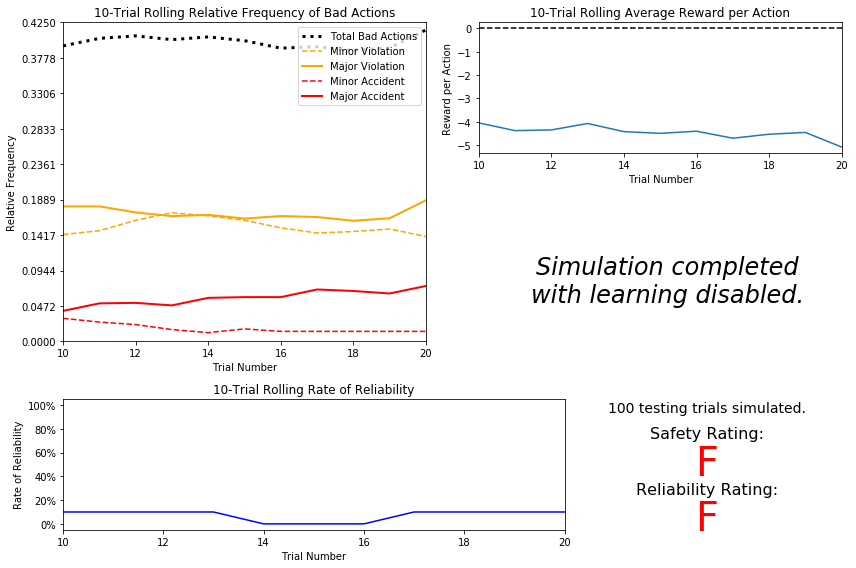

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- **How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?**

* The relative frequency of Total Bad Action is around 0.40. If we look to individual bad actions we can see some actions that are more frequent than others. The group Major Violation is more frequent than Minor Accident, but in total, there are around 0.4 of relative frequency of at least one bad decision happen.Train a smartcab to drive is very complicated because we have peopl's safety involved in the process when it is applicated in real life, so any bad decision (Accident or Violation) can cause an accident.

- **Given that the agent is driving randomly, does the rate of reliability make sense?**

  Yes, It does. We can see an small rate of reliability but it happens because the agent is driving randomly. The agent has a high probability of cause at least one major accident and it can fails to reach the destination on time. No matter how many traffic rules the smartcab face, he will always make a randomly choose.

- **What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**

  The agent is reciving positive and negative rewards. As the actions are chosen randomly and the negative rewards are more heavy, the final score in each trial number is negative.

- **As the number of trials increases, does the outcome of results change significantly?**

  No, it does not. We can see the result changing but is not significant.


- **Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**

  No, the Smartcab would not be considered safe. The Safety rating and the Reliability rating are F, it means:
  Safety rating F: Agent causes at least one major accident, such as driving through a red light with cross-traffic. Reliability rating F: Agent fails to reach the destination on time for at least 60% of trips.
  With the information provided before, a major accident is not considered safety.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

* I think all inputs are relevant for learning both safety and efficiency.

    Waypoints and deadline helps the Smartcabs reach the destination (efficiency), while inputs keep the car following the traffic rules (safety). This process ensures that the Smartcab arrives at its destination without accident fulfilling the role. Without this combination of features, efficiently and safely, the goal is not reached.

    The features 'light', 'left' and 'oncoming' are necessary to understand the present state of the agent in order to take further steps without inflict the law.
    
    The 'right' features has a correlation with others policy’s rule and is possible to work to minimize the process of learning by dropping this features. Let assume that all agent are following the traffic law, there is no state that could be altered by the presence of a car from the right when the light is red for this agent. If my agent’s light is red, then the only viable movement is a right turn which would be unaffected by a car approaching from the right. So I’m going to follow without the ‘right’ feature.

    Specifically the waypoint, given the start point,it works leading the Smartcab to the destination while deadline make some counts of action remains to reach the destination before running out of time.

    I think all features are appropriated for modelling the smartcab in the environment, but I think that there are others features important too like, speedy and others traffic signs. For this exercise, the features mentioned are enough.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

* Lets see which are ours possibility in this exemplo:

  We have the follow features: Waypoints, inputs light, input left, input oncoming, all of this with a possibility of occurrence
        
     Waypoints:       numbers of state 3 (forward ,left, right)

     Inputs light:    numbers of state 2 (red, green)

     Inputs left:     numbers of state 4 (None, forward, left, right)

     Inputs oncoming: numbers of state 4 (None, forward, left, right)
    
    Now we must consider all possible combination of this features:
    
    3 X 2 X 4 X 4 = 96, that are the total number of states.
    
    This is not a large number of states for a computer process and make a good decision. The agent can learn reasonable number of training trials very fast and the learning can be applyed on time. If the numbers of features increase the number of possible combination can increase exponentially becoming a problem to computer performance and the learning could not be applied on time.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

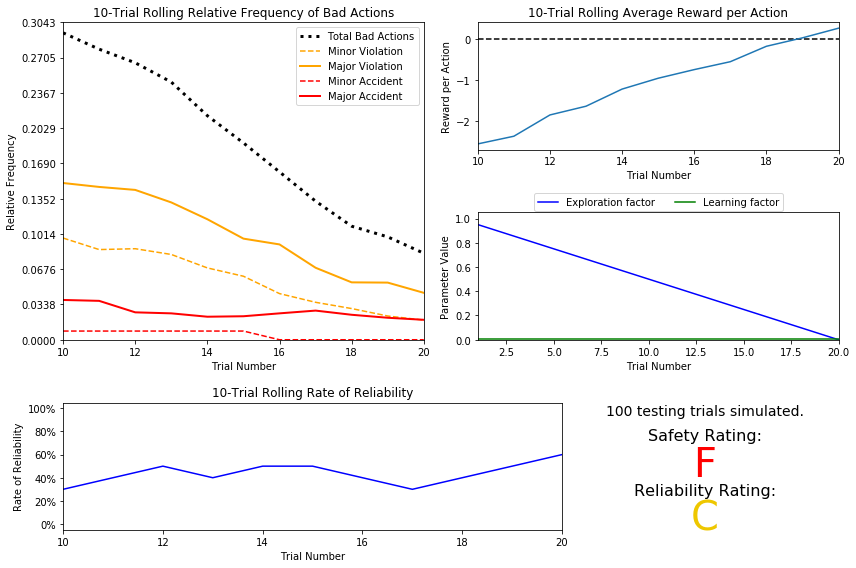

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- **Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?**

  No, there are not. The observation are different from each other. The curve of frequency of bad action using Q-learning simulation decrease with the Trial Number increase. It shows us that the learning is not more randomly and now the algorithm can learn and apply the learned rules.
The rolling average rewards per action tends to minimize as Numbers Trial increase, while in the agent in question 3 the same curv stays horizontal. The final rating (Safety rating = F and Reliability rating = C ) is not good enough because here the smartcab has a high probability of have a high total bad accidents, I think that if we change some parameters like the function for epsilon we can get better results.

- **Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?**

  The drive agents took 20 training trial to learn and this make sense because our parameters are 0.05 at each training trial with an epsilon-tolerance of 0.05. So, 1.0 - (20 x 0.05) = 0.0 < 0.05.

- **Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?**

  Yes, it is. The function decrease to zero in 20 steps.

- **As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?**

  As the numbers of Trial Training increase the relative frequency of total bad action decrease, I have only major accident increasing, but i think I can adjust the curve by working with other function of epsilon. Talking about the reward, the reward per action increase with Trial Numbers increase.

- **How does the safety and reliability rating compare to the initial driving agent?**

  I have the same safety rating (F), but my reliability rating is better now (now is C, before was F). Rightnow the agent reaches the destination on time for at least 70% of trips while before the agent fails to reach the destination on time for at least 60% of trips(is diffente bu not a "big" difference).

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

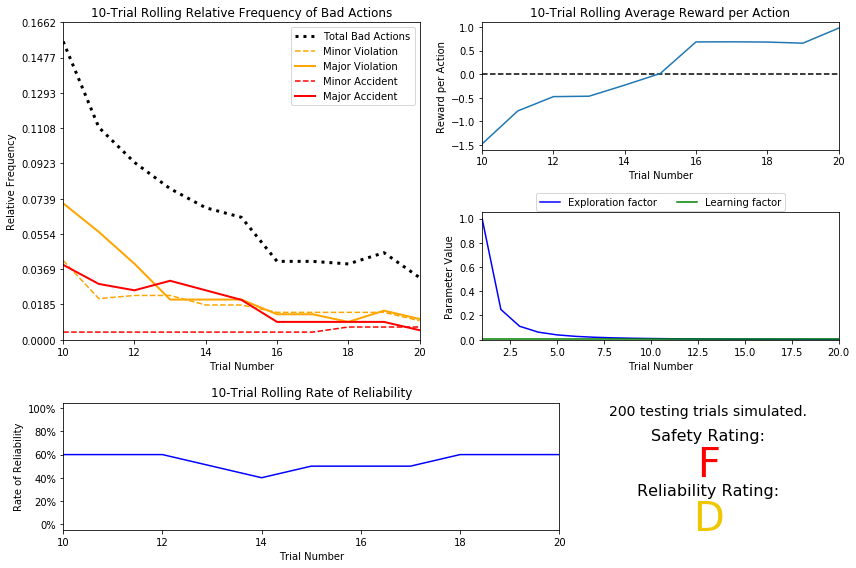

In [20]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
# self.epsilon = 1.0/(self.t**2)

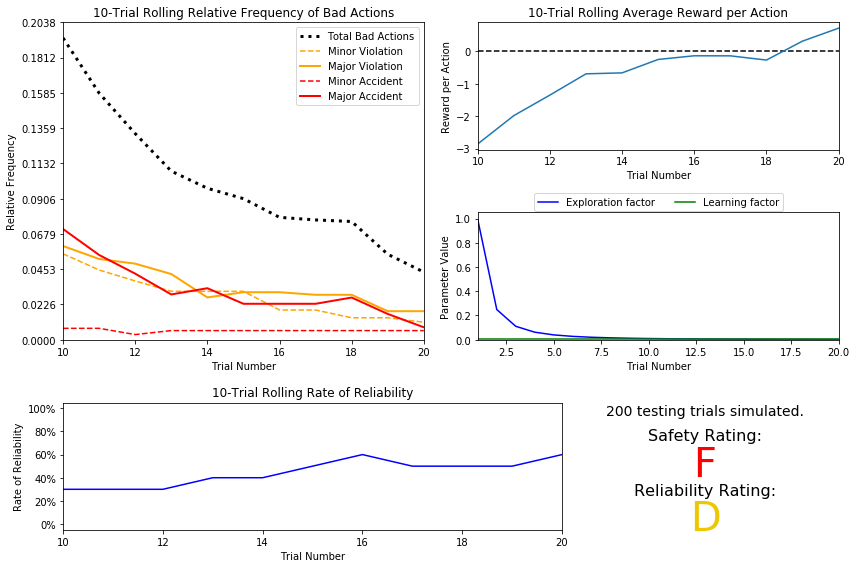

In [19]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = 1.0/(self.t**2 + self.alpha*self.t)

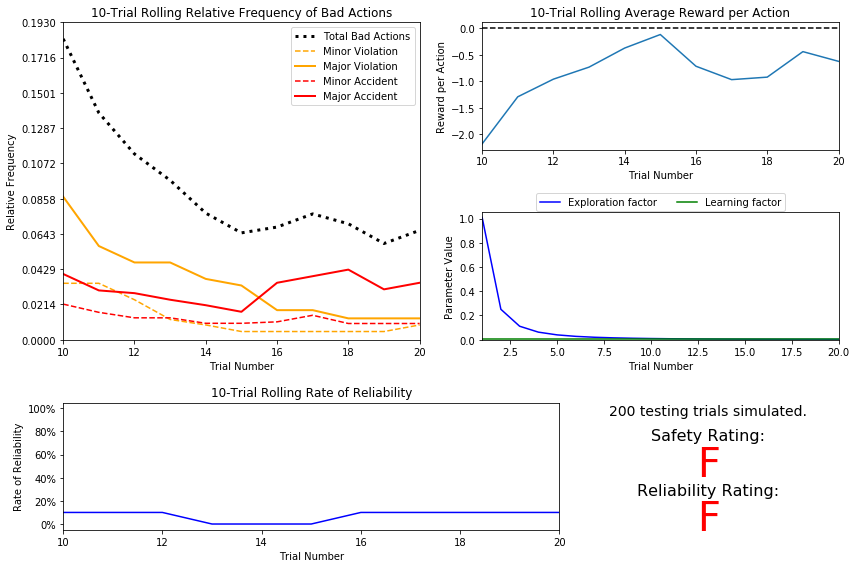

In [18]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#  self.epsilon = 1.0/(self.t**2 - self.alpha*self.t)

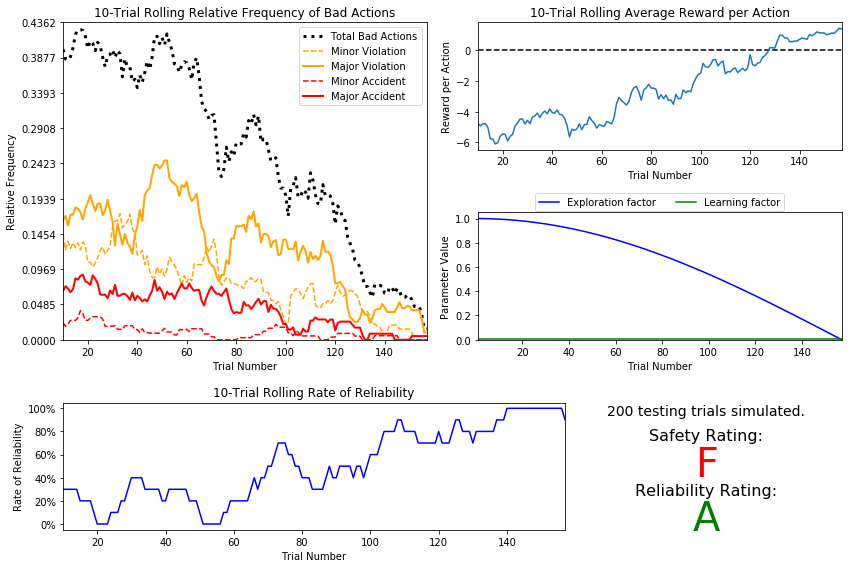

In [17]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
    
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
    

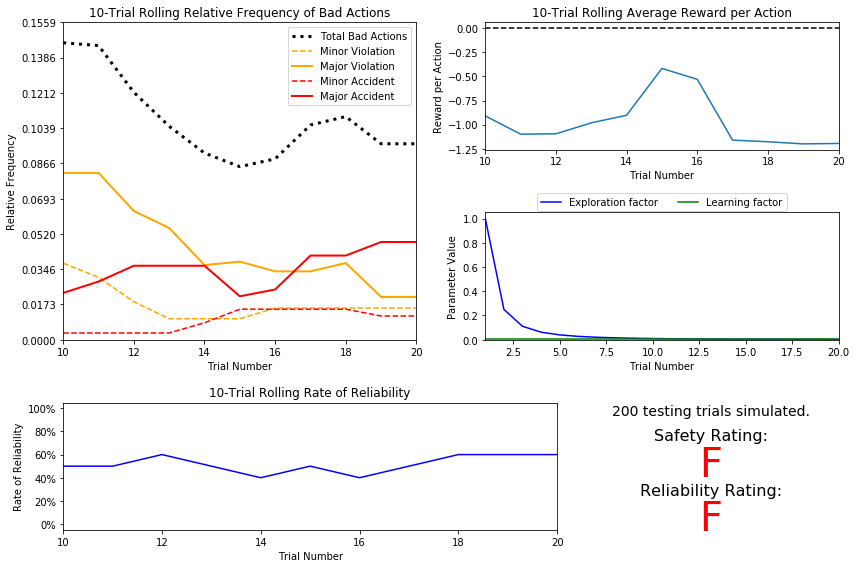

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))/(self.t**2)

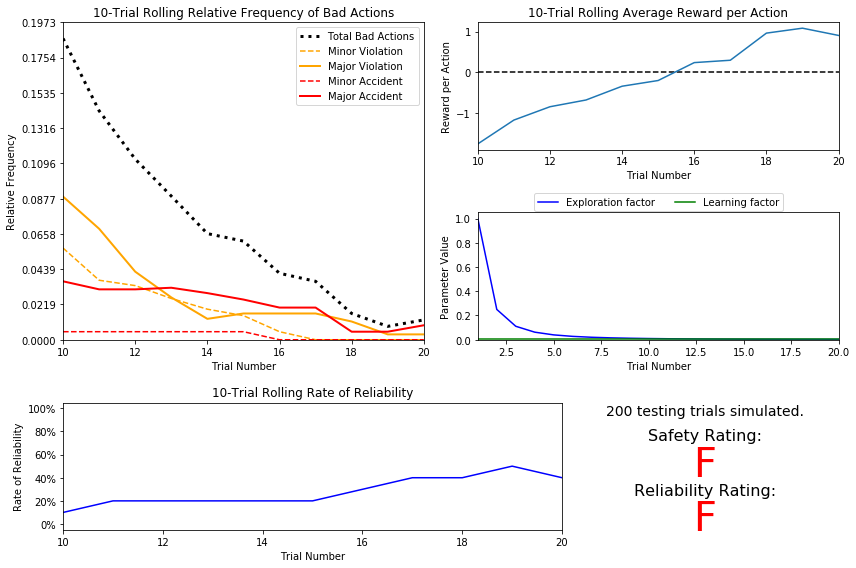

In [15]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = 1.0/(self.t**2)

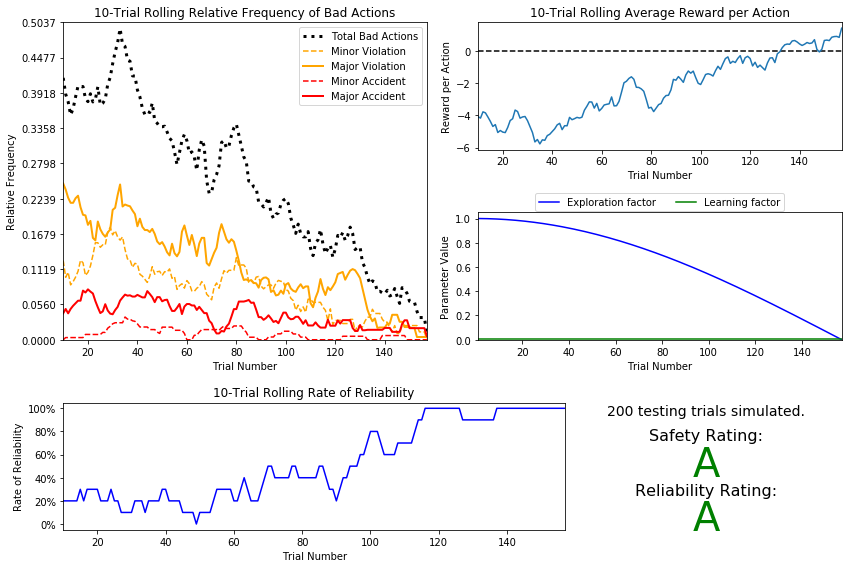

In [14]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=200, tolerance=0.005)

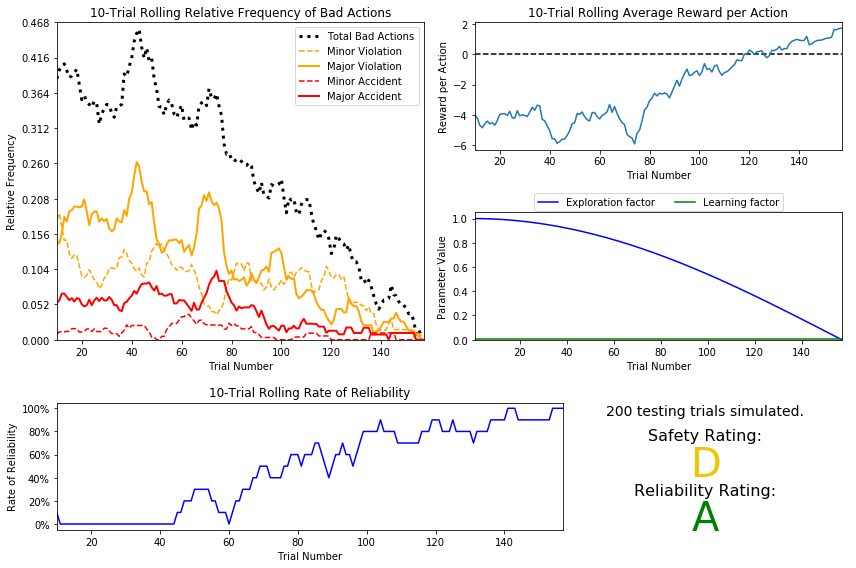

In [21]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=200, tolerance=0.001)

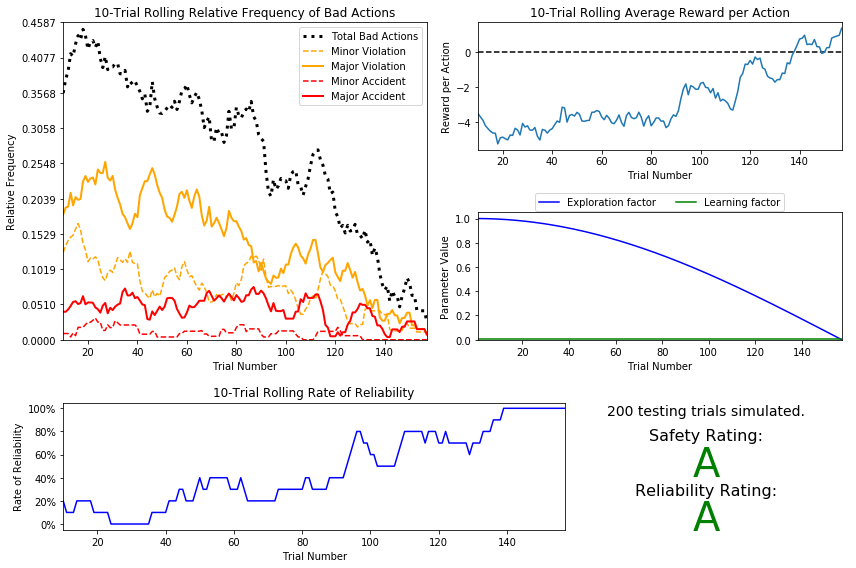

In [22]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=200, tolerance=0.01)

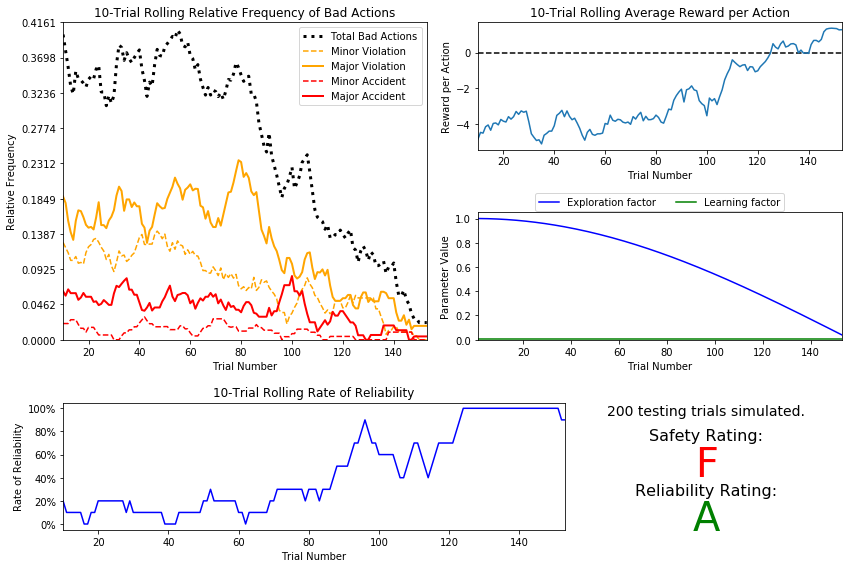

In [23]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=200, tolerance=0.05)''''''''

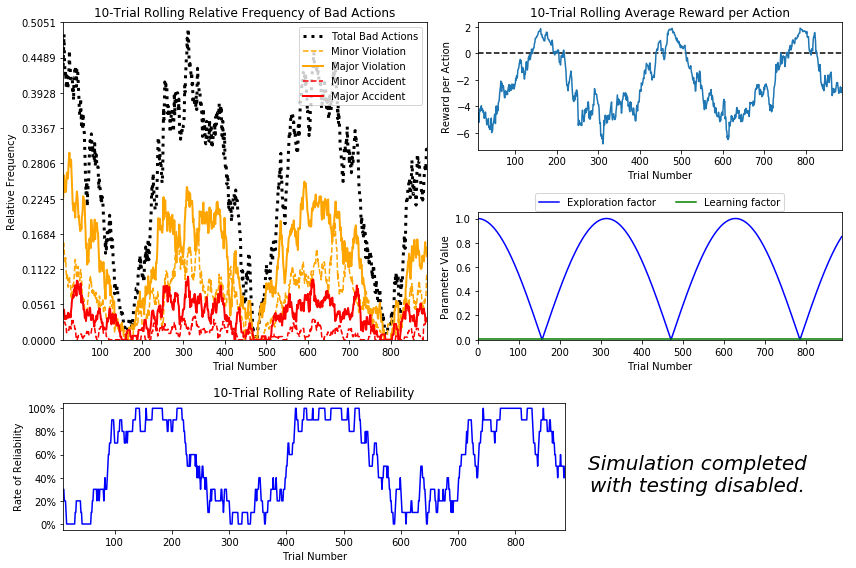

In [24]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=200, tolerance=0.0001)

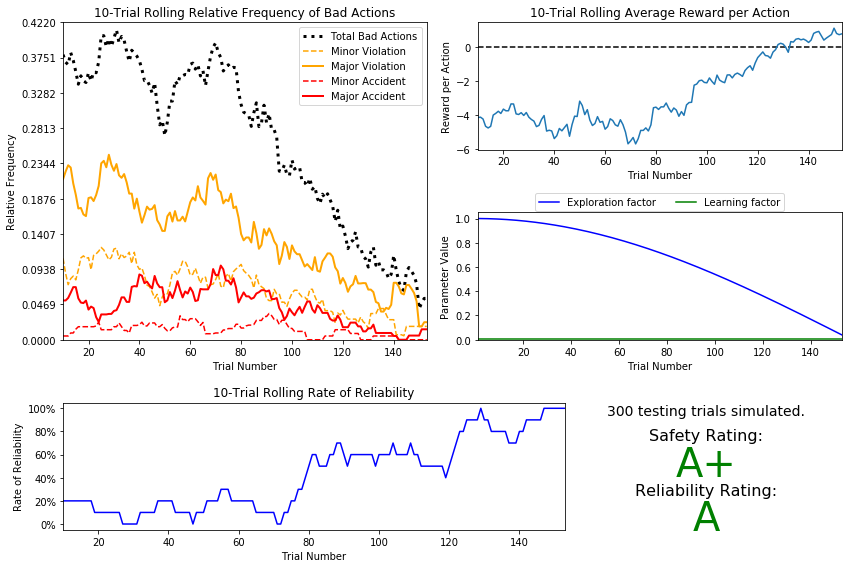

In [26]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=300, tolerance=0.05)
#epsolon 0.5 alfa 0.01

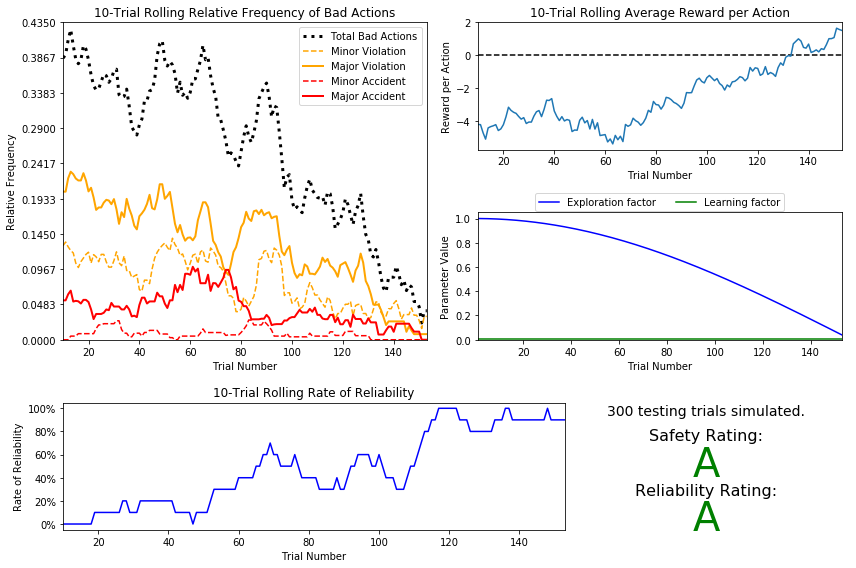

In [27]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=300, tolerance=0.05)
#epsolon 0.6

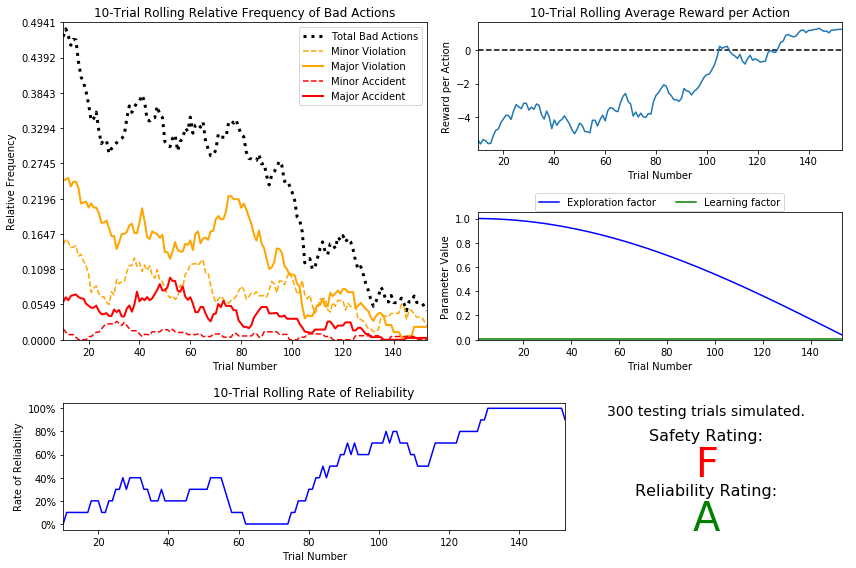

In [28]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=300, tolerance=0.05)
#epsolon 0.4

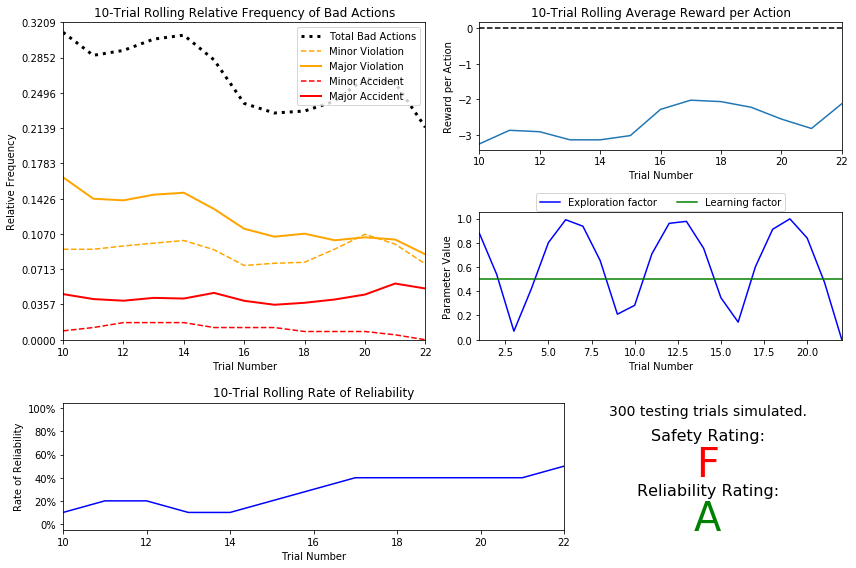

In [29]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=300, tolerance=0.05)
#epsolon 0.5 alfa 0.5

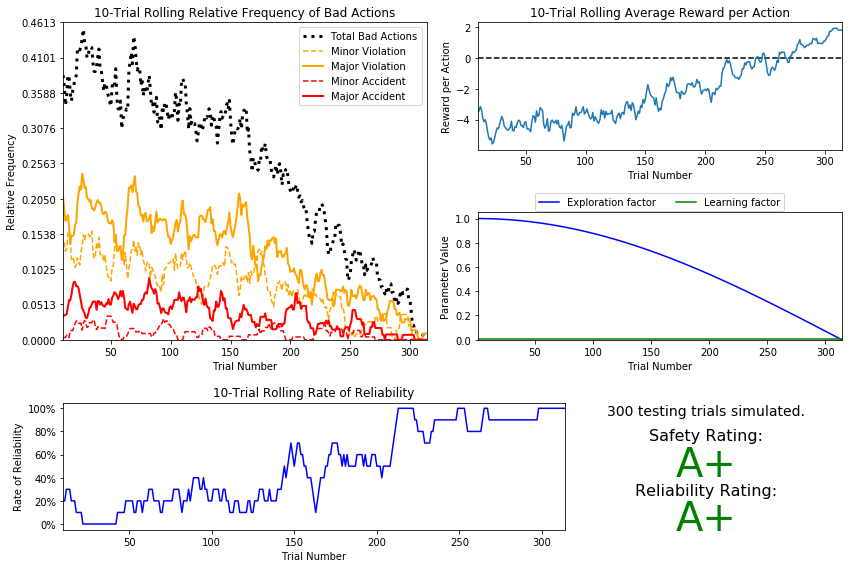

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
#self.epsilon = math.fabs(math.cos(self.alpha*self.t))
#sim.run(n_test=300, tolerance=0.05)
#epsolon 0.5 alfa 0.05

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**


- **What decaying function was used for epsilon (the exploration factor)**

    I tried several combination of parameters as a exercise to undestand how parameters works and to find a optimal rating. I let some notes on code to differentiate the parameters that I used.
    
    I will describe the last one, that is the best rating that I got.

  I used the decaying function “epsilon=ABS(COS(at))” because the curve of bad actions follow a tendency of decrease with the trial numbers encreasy and the final rating that I got was A+ and A+. All relative frequency of bad actions tends to zero as the trial numbers increasy and all curve lay down 0.05 of relative frequency. This curves are all best when we compare with the basic drive agent (default learning). The rate of reliability starts around 20% and after 100 Trial Number, the curve goes to another level (around 50%) until reach number trial of 180. After 250 Trial Number the curve of rate reliability goes to around 100% becoming stable and it give us a Reliability Rating of A+.
  The rolling Average Reward per action follows a positive tendence line becomes positives (maximizing) after 250 Trial Numbers. All this combination of learning gave me in the final two rating "A+" (Safety and Reliability).

- **Approximately how many training trials were needed for your agent before begining testing?**

  It took 300 training trials before the final optimized Q-Learning agent started testing. This number makes sense given the formula that I used as my decaying function

- **What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**

  I used epsilon of 0.5 and alpha of 0.01
  
  With the equation mentioned before, I tried 4 valor of epsilon (0.1, 0.4, 0.5, 0.6) and I got the best combination of rating using the epsilon 0.5, so I continued with this epsilon.
  
  With epsilon 0.5, I tried 4 alpha (0.01, 0.5, 0.05, 0.005) and I choosed 0.01 because I got the rating A+ and A+ for this round.


- **How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**

  I got Safety and Reliability Rating A+ with my last Q-Learner while the default Q-Learner has F and C rating for Safety and Reliability respectively. In the default Q-learning, the curve of bad actions does not learn with the Trial Numbers while in the optimum Q-Learned the curves tends to zero. The curve of average of reward per action is completely different maximizing the rewards. So the improvement is the assurance that we have in safety and reliability

- **Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**

  Yes, I would. Comparing the ratings between the optimized Q-learned and the default Q-learned we have improvements, so the agent learned the policy.

- **Are you satisfied with the safety and reliability ratings of the *Smartcab*?**

  Yes,I am. I am satisfied with the Smartcab agent's A+ ratings for safety and A+ rating for reliability after 300 tests trials.
 
  A+ Safety means Agent commits no traffic violations, and always chooses the correct action that sounds good to me. A+ for Reliability means that the Agent reaches the destination in time for 100% of trips and thats sounds good, so this combination of rating is very acceptable.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._**
   
* I think the optimal policy should follow the traffic laws of local place, so I can exemplifying in this case:

  The optimal policy for a smartcab is:

    1 - If the light is green then the agent should proceed in direction of waypoint.

    2 - If light is red and waypoint is right, then the agent should consider "left" traffic and proceed if not "forward", otherwise stay idle.

    3 - If the light is red and waypoint is left or forward, wait for the signal.
  
  Obs: Here is possible turn right even if the light is red and there is no car going right. So we need combine multiple actions that follows this rules to reach the point as our algorithm has learned

   
**2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ **

* I looked several output in the file "sim_improved-learning.txt" and most of them are correct and the output follow the optimal policy. One exemple of what is not the ideal policy is:
  
  Exemple:
  
  Output "(left_red_right_forward)"

  Rewards:
 
     -- forward : -0.05
     
     -- right : 0.03
     
     -- None : 0.01
     
     -- left : 0.00
  
  This case is not the best policy, because the light is red and the oncoming traffic is foward, so my agent should stay idle and in this case the high reward is to turn rigth.
  
    like in Question 8.1:
    
    "2 - If light is red and waypoint is right, then the agent should consider "left" traffic and proceed if not "forward", otherwise stay idle."


**3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.**

* I will explain the example by using the description of the optimal policy that I explain in question 8.1:
 
  The sequence of output:
  ("Waypoints"_"light"_"left traffic"_"oncoming_traffic")
 
  **Exemplo 1**:
 
  Correct Policy from question 8.1
  "1 - If the light is green then the agent should proceed in direction of waypoint.
 
  (forward_green_None_None:)
 
     -- forward : 1.04
     
     -- right : 0.14
     
     -- None : -1.17
     
     -- left : 0.17
 
   **Exemplo 2**:
   
   Correct Policy from question 8.1
   
   "1:If light is red and waypoint is right, then the agent should consider "left" traffic and proceed if not "forward", otherwise stay idle.
 
     (right_red_None_None)
     
     -- forward : -3.40
     
     -- right : 0.82
     
     -- None : 0.17
     
     -- left : -2.89
 
   **Exemplo 3**:
   
   Correct Policy from question 8.1:
   
   3 - If the light is red and waypoint is left or forward, wait for the signal.
   
     (forward_red_right_None):
    
     -- forward : -0.29
     
     -- right : 0.03
     
     -- None : 0.25
     
     -- left : -0.70
 
 
** 4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.**

* In this example (question 8.1) the smartcab should stay idle as optimal movement but received more reward as a movement right
 
  Output "(left_red_right_forward)"

  Rewards:
 
     -- forward : -0.05
     
     -- right : 0.03
     
     -- None : 0.01
     
     -- left : 0.00



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

* I think that the policy is more complexity than 3 principal rules as described in previous section, the Smartcab needs understand when cars is stopping and others traffic advice for exemple, so the algorithm needs to be more complexity than this one desenvolved here. All others policy needs garant that the passengers will arrived in the destination saffet and on time.
  Another point is with this background of have a reward step by step, is not possible to have a future reward, so the Smartcab will take one decision after decision being not able deciding future steps.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.